In [91]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [2]:
#1. 데이터 입력
data = pd.DataFrame({
    'Height':[165, 179, 198, 163, 171, 159, 174, 172, 180, 167],
    'Sex':['Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Weight':[43, 56.5, 64, 52, 46, 48.5, 59, 60, 70, 47.5]
})

In [3]:
#2. Sex 컬럼 수동 인코딩 (Male=1, Female=0)
data['Sex'] = data['Sex'].map({'Male':1, 'Female':0})

In [4]:
#3. X, y 분리
X = data[['Height', 'Sex']]
y = data['Weight']

In [119]:
#4. Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
#X_train, y_train = X, y

In [89]:
#5. 모델 학습
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

예측값: [44.52001005 51.99999999 69.99999999]
실제값: [47.5 48.5 64. ]
MSE: 19.04344661505873
R^2: 0.6662297574770621


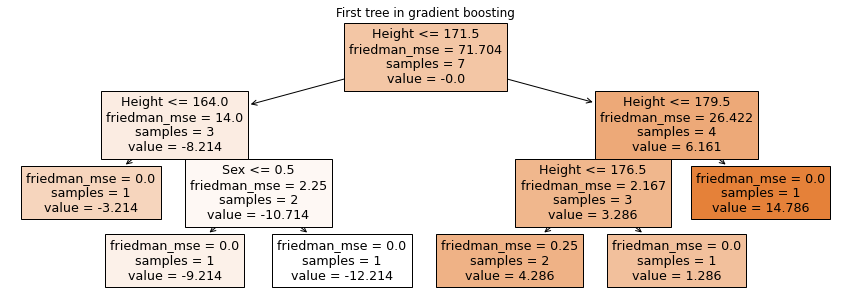

In [90]:
#6. 예측 및 평가
y_pred = model.predict(X_test)

print("예측값:", y_pred)
print("실제값:", y_test.values)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

plt.figure(figsize=(15, 5))
plot_tree(model.estimators_[0, 0], filled=True, feature_names=X.columns) #model.estimators_[0,0]: first tree, [1,0]: second tree
plt.title("First tree in gradient boosting")
plt.show()

In [120]:
#7. 그리드 서치용 파라미터 후보 정의
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 2, 3, 4, 5]
}

In [129]:
#8. 그리드 서치 CV 설정
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='r2')

In [130]:
#9. 학습
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 500, 1000]},
             scoring='r2')

In [131]:
#10. 결과 출력
print("Best parameters:", grid_search.best_params_)
print("Best R2 score (CV):", grid_search.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
Best R2 score (CV): 0.03599102568435756


In [132]:
#11. 테스트셋 성능 확인
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)
print("Test set R2:", r2_score(y_test, y_pred2))
print("Test set MSE:", mean_squared_error(y_test, y_pred2))

Test set R2: 0.8785909470503784
Test set MSE: 6.927060965514521
